<a href="https://colab.research.google.com/github/namratabalwani/contribute-practice/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=8000)

In [29]:
I1 = cv.imread('/content/drive/My Drive/DIP-ESE558/Project 6/dance2gray512.jpg')
M,N,C = I1.shape
I2 = cv.cvtColor(I1,cv.COLOR_RGB2GRAY)


In [30]:

I2 = I2.astype(np.float64) / 255.0
P1 = np.zeros((M,M), dtype=np.complex128)
Q1 = np.zeros((N,N), dtype=np.complex128)
H = np.ones((M,N))
G = np.zeros((M,N), dtype=np.complex128)
P2 = np.zeros((M,M), dtype=np.complex128)
Q2 = np.zeros((N,N), dtype=np.complex128)
I3 = cv.cvtColor(I1, cv.COLOR_RGB2HSV)

for u in range(M):
    for m in range(M):
        P1[u,m] = (1/M) * np.exp(-2j * np.pi * ((u * m)/M))

for n in range(N):
    for v in range(N):
        Q1[n,v] = (1/N) * np.exp(-2j * np.pi * ((v * n)/N))

#DFT of I2 = P1 * I2 * Q1
dft_I2 = np.matmul(np.matmul(P1, I2), Q1)

for u in range(M):
    for v in range(N):
        if ( ((u<5) and (v<5)) or ((u>(M-5)) and (v<5)) or ((u<5) and (v>(N-5))) or ((u>(M-5)) and (v>(N-5))) ):
            H[u,v] = 0.5 # according to condition over write existing 1 at H(u,v)

# G[u][v]=H[u][v] F[u][v]
G = H * dft_I2

for u in range(M):
    for m in range(M):
        P2[u,m] = np.exp(2j * np.pi * ((u * m)/M))

for n in range(N):
    for v in range(N):
        Q2[n,v] = np.exp(2j * np.pi * ((v * n)/N))

#IDFT of G: g = P2 * G * Q2
g = np.matmul(np.matmul(P2, G), Q2)

I3[:,:,2] = np.abs(g) # take the magnitude of g as it is complex
I3 = cv.cvtColor(I3, cv.COLOR_HSV2RGB)



Original Image


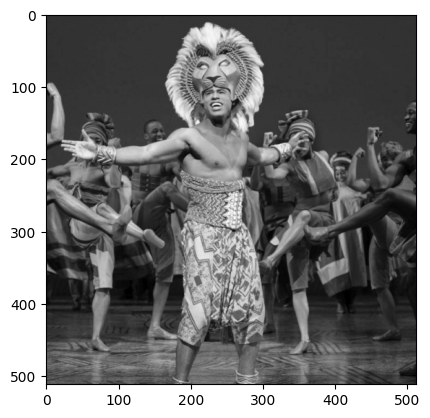

IDFT Output Image:


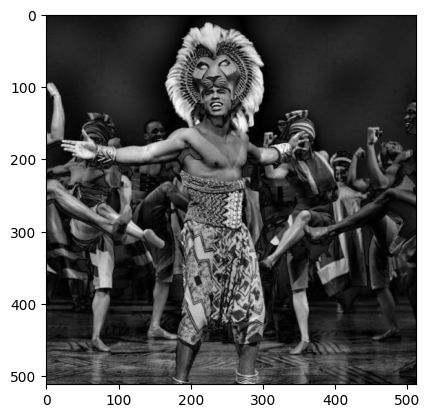

In [31]:
print("Original Image")
I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)
pixels = np.array(I1)
plt.imshow(pixels)
plt.show()



print("IDFT Output Image:")
pixels = np.array(np.abs(g))
plt.imshow(pixels, cmap='gray')
plt.show()



